<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/Classification/Income-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age Vs Salary Classification either obove 50k or less 50k through logistic regression classification

Reference of data set: https://www.kaggle.com/wenruliu/adult-income-dataset

![](https://miro.medium.com/max/668/0*g0SY0MVS41m_Yma_.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/adult_data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


income
<=50K    37155
>50K     11687
Name: count, dtype: int64


<Axes: xlabel='income', ylabel='count'>

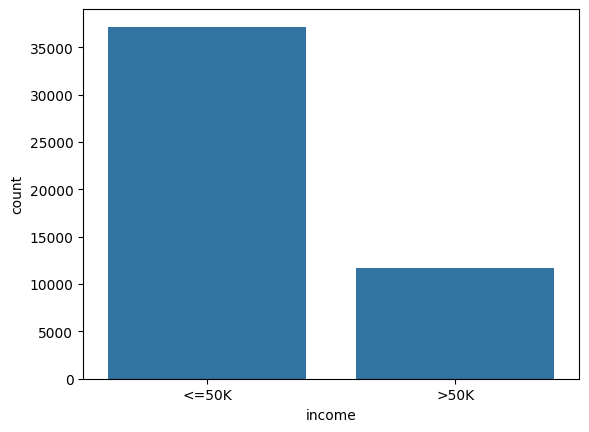

In [ ]:
import seaborn as sns
print(df['income'].value_counts())
sns.countplot(x='income', data=df)

In [ ]:
# Check for missing values
for col in df.columns:
    print(f"'{col}': {df[df[col] == '?'].shape[0]}")

'age': 0
'workclass': 2799
'fnlwgt': 0
'education': 0
'educational-num': 0
'marital-status': 0
'occupation': 2809
'relationship': 0
'race': 0
'gender': 0
'capital-gain': 0
'capital-loss': 0
'hours-per-week': 0
'native-country': 857
'income': 0


In [ ]:
missing_all_three = df[(df['workclass'] == '?') & (df['occupation'] == '?') & (df['native-country'] == '?')]
print(f"Number of rows missing all three values: {missing_all_three.shape[0]}")

Number of rows missing all three values: 46


In [ ]:
# Drop rows where all these three values are missing
print(f"Shape of DataFrame before dropping rows: {df.shape}")
df_cleaned = df.drop(missing_all_three.index)
print(f"Shape of DataFrame after dropping rows: {df_cleaned.shape}")

Shape of DataFrame before dropping rows: (48842, 15)
Shape of DataFrame after dropping rows: (48796, 15)


In [ ]:
# Fill "workclass", "occupation", and "native-country" with mode
columns_to_fill = ['workclass', 'occupation', 'native-country']

for col in columns_to_fill:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col] = df_cleaned[col].replace('?', mode_value)
    print(f"Value counts for '{col}' after filling missing values:\n{df_cleaned[col].value_counts()}\n")

Value counts for 'workclass' after filling missing values:
workclass
Private             36659
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Value counts for 'occupation' after filling missing values:
occupation
Prof-specialty       8935
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Value counts for 'native-country' after filling missing values:
native-country
United-States                 44643
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48796 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48796 non-null  int64 
 1   workclass        48796 non-null  object
 2   fnlwgt           48796 non-null  int64 
 3   education        48796 non-null  object
 4   educational-num  48796 non-null  int64 
 5   marital-status   48796 non-null  object
 6   occupation       48796 non-null  object
 7   relationship     48796 non-null  object
 8   race             48796 non-null  object
 9   gender           48796 non-null  object
 10  capital-gain     48796 non-null  int64 
 11  capital-loss     48796 non-null  int64 
 12  hours-per-week   48796 non-null  int64 
 13  native-country   48796 non-null  object
 14  income           48796 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
# Drop "fnlwgt" as it is a sampling weight
# Drop "education" as the data already contain "educational-num"
df_cleaned = df_cleaned.drop(['fnlwgt', 'education'], axis=1)
display(df_cleaned.head())
df_cleaned.info()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
Index: 48796 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48796 non-null  int64 
 1   workclass        48796 non-null  object
 2   educational-num  48796 non-null  int64 
 3   marital-status   48796 non-null  object
 4   occupation       48796 non-null  object
 5   relationship     48796 non-null  object
 6   race             48796 non-null  object
 7   gender           48796 non-null  object
 8   capital-gain     48796 non-null  int64 
 9   capital-loss     48796 non-null  int64 
 10  hours-per-week   48796 non-null  int64 
 11  native-country   48796 non-null  object
 12  income           48796 non-null  object
dtypes: int64(5), object(8)
memory usage: 5.2+ MB


In [ ]:
# Convert "gender" to "male" (Categorical to Boolean)
df_cleaned['male'] = df_cleaned['gender'] == 'Male'
df_cleaned = df_cleaned.drop('gender', axis=1)
display(df_cleaned.head())
df_cleaned.info()

,age,workclass,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,male
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,<=50K,True
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,<=50K,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,>50K,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,>50K,True
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,0,0,30,United-States,<=50K,False


<class 'pandas.core.frame.DataFrame'>
Index: 48796 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48796 non-null  int64 
 1   workclass        48796 non-null  object
 2   educational-num  48796 non-null  int64 
 3   marital-status   48796 non-null  object
 4   occupation       48796 non-null  object
 5   relationship     48796 non-null  object
 6   race             48796 non-null  object
 7   capital-gain     48796 non-null  int64 
 8   capital-loss     48796 non-null  int64 
 9   hours-per-week   48796 non-null  int64 
 10  native-country   48796 non-null  object
 11  income           48796 non-null  object
 12  male             48796 non-null  bool  
dtypes: bool(1), int64(5), object(7)
memory usage: 4.9+ MB


In [ ]:
# We can see that "United-States are about 90% of the data. To simplify the model, change "native-country" to "US-native" (categorical to boolean)
df_cleaned['US-native'] = df_cleaned['native-country'] == 'United-States'
df_cleaned = df_cleaned.drop('native-country', axis=1)
display(df_cleaned.head())

,age,workclass,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,income,male,US-native
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,<=50K,True,True
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,<=50K,True,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,>50K,True,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,>50K,True,True
4,18,Private,10,Never-married,Prof-specialty,Own-child,White,0,0,30,<=50K,False,True


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48796 entries, 0 to 48841
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   48796 non-null  int64 
 1   educational-num                       48796 non-null  int64 
 2   capital-gain                          48796 non-null  int64 
 3   capital-loss                          48796 non-null  int64 
 4   hours-per-week                        48796 non-null  int64 
 5   income                                48796 non-null  object
 6   male                                  48796 non-null  bool  
 7   US-native                             48796 non-null  bool  
 8   workclass_Local-gov                   48796 non-null  bool  
 9   workclass_Never-worked                48796 non-null  bool  
 10  workclass_Private                     48796 non-null  bool  
 11  workclass_Self-emp-inc           

In [ ]:
# Convert the remaining data into numerical format using one-hot encoding
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

display(df_cleaned.head())

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,male,US-native,workclass_Local-gov,workclass_Never-worked,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,7,0,0,40,<=50K,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1,38,9,0,0,50,<=50K,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,28,12,0,0,40,>50K,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,44,10,7688,0,40,>50K,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,30,<=50K,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('income',axis=1)
y = df_cleaned['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

In [ ]:
# Train and predict
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(list(y_test[:10]))
print(y_pred[:10])

['<=50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K']
['<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '>50K']


In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_pred, labels=["<=50K",">50K"])

array([[10194,   941],
       [ 1795,  1709]])

In [ ]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

       <=50K     0.8503    0.9155    0.8817     11135
        >50K     0.6449    0.4877    0.5554      3504

    accuracy                         0.8131     14639
   macro avg     0.7476    0.7016    0.7185     14639
weighted avg     0.8011    0.8131    0.8036     14639

